In [59]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # defining the colour palette
flatui = sns.color_palette(flatui)

In [60]:
df=pd.read_csv('playerdtls.csv')
df.head()

,PlayerId,GameGroupName,GameName,BetQuantity,BetAmount,PurchaseTime,Purchasedate
0,723713783,Lucky 3,Lucky3 Morning,1,50,1/6/2020 2:29,1/6/2020
1,721207941,Lucky 3,Lucky3 Morning,1,200,1/6/2020 5:46,1/6/2020
2,722276226,KENNO,MON KENNO,1,50,1/6/2020 6:37,1/6/2020
3,722508537,KENNO,MON KENNO,1,50,1/6/2020 6:41,1/6/2020
4,727445330,Lucky 3,Lucky3 Morning,1,50,1/6/2020 7:16,1/6/2020


In [61]:
df.shape

(689, 7)

From the above table, we can summarize that there are 689 rows and 7 columns

In [62]:
df.isnull().sum()

PlayerId         0
GameGroupName    0
GameName         0
BetQuantity      0
BetAmount        0
PurchaseTime     0
Purchasedate     0
dtype: int64

we checked if there are any null values, after performing the function, we can see that there are no null values in the dataset.

In [63]:
# Lets see the information, datatypes in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PlayerId       689 non-null    int64 
 1   GameGroupName  689 non-null    object
 2   GameName       689 non-null    object
 3   BetQuantity    689 non-null    int64 
 4   BetAmount      689 non-null    int64 
 5   PurchaseTime   689 non-null    object
 6   Purchasedate   689 non-null    object
dtypes: int64(3), object(4)
memory usage: 37.8+ KB


Data Preprocessing

In [64]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PlayerId       689 non-null    int64
 1   GameGroupName  689 non-null    int8 
 2   GameName       689 non-null    int8 
 3   BetQuantity    689 non-null    int64
 4   BetAmount      689 non-null    int64
 5   PurchaseTime   689 non-null    int16
 6   Purchasedate   689 non-null    int8 
dtypes: int16(1), int64(3), int8(3)
memory usage: 19.6 KB


In [66]:
df['PlayerId'].value_counts().sum()

689

In [67]:
df['PlayerId'] = df['PlayerId'].apply(lambda x : 1 if x == 0 else x)

In [68]:
len(df['PlayerId'])

689

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler
players_val = np.array(df[['PlayerId']])
# players_val = players_val.reshape(-1,1)
val_eur_normalised = MinMaxScaler().fit_transform(players_val)
val_eur_normalised[655]

array([0.88620774])

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerId,689.0,7.240167e+08,2.704482e+07,111458272.0,721354985.0,722589164.0,724463434.0,799736758.0
GameGroupName,689.0,9.143687e-01,8.104942e-01,0.0,0.0,1.0,2.0,2.0
GameName,689.0,3.204644e+00,2.598676e+00,0.0,1.0,2.0,6.0,8.0
BetQuantity,689.0,1.632801e+00,1.797163e+00,1.0,1.0,1.0,1.0,20.0
BetAmount,689.0,8.885341e+01,9.365320e+01,20.0,50.0,50.0,100.0,1000.0
PurchaseTime,689.0,2.786255e+02,1.543361e+02,0.0,149.0,280.0,402.0,557.0
Purchasedate,689.0,2.053701e+00,1.081701e+00,0.0,2.0,2.0,3.0,4.0


As , mean, mean , std only defines with numerical variables, the describe column has taken only numerical columns to define the same 

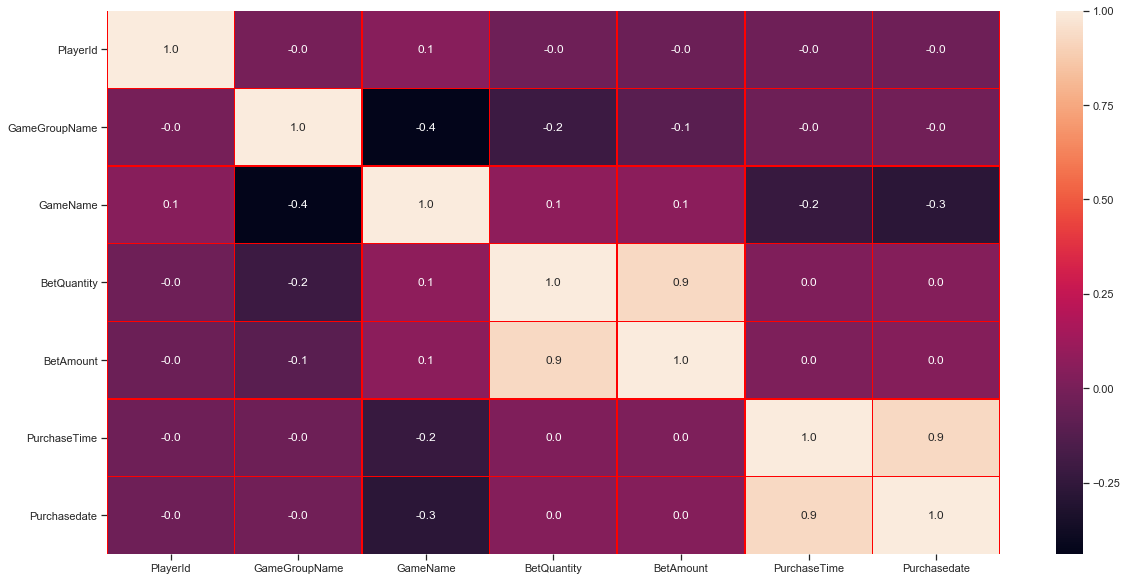

In [71]:
# Lets see the correlation of the data
# Plotting the Heatmap of the columns using correlation matrix
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

 From the above analysis, we can see that there is not positive correlation. 

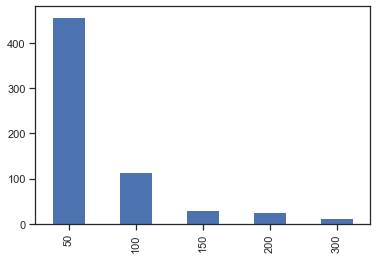

In [72]:
df['BetAmount'].value_counts()[0:5].plot(kind='bar')

Text(0.5, 0, 'Age')

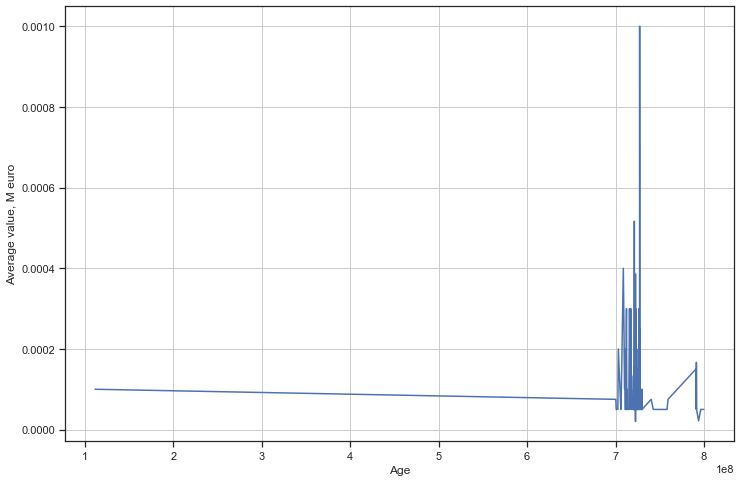

In [73]:
Players_Id_name=df.groupby('PlayerId')['BetAmount'].mean()/1e6
Players_Id_name.plot(grid=True,figsize=(12,8))
plt.ylabel('Average value, M euro')
plt.xlabel('Age')

above is the univariate plot which shows the amount of bets is been put with respect to players

In [74]:
df.head()

,PlayerId,GameGroupName,GameName,BetQuantity,BetAmount,PurchaseTime,Purchasedate
0,723713783,2,4,1,50,45,0
1,721207941,2,4,1,200,46,0
2,722276226,0,5,1,50,47,0
3,722508537,0,5,1,50,48,0
4,727445330,2,4,1,50,49,0


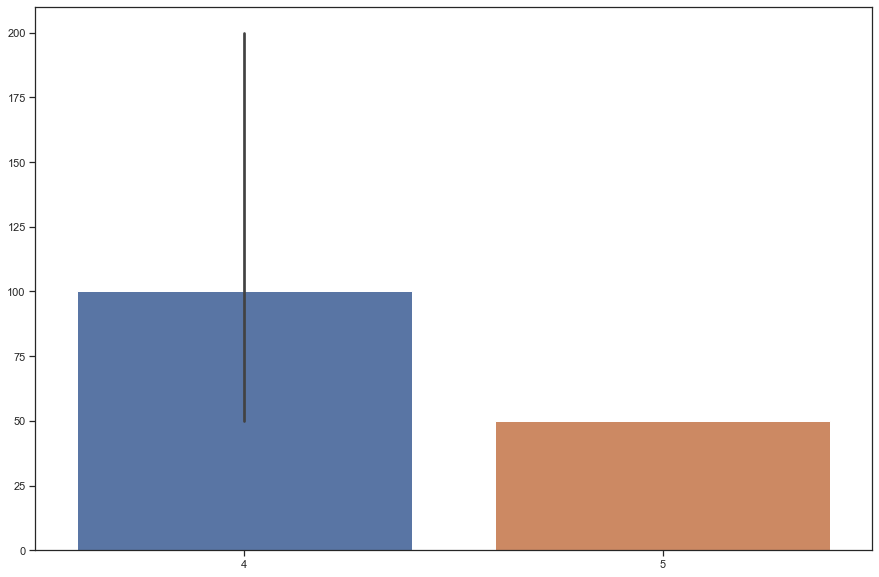

In [75]:
# Lets do the bivariate analysis between BetAmount for the Game Name 
plt.subplots(figsize=(15,10))
sns.barplot(list(df['GameName'][0:5]),list(df['BetAmount'][0:5]))

it is found the Lucky3 Morning has the highest betAmount

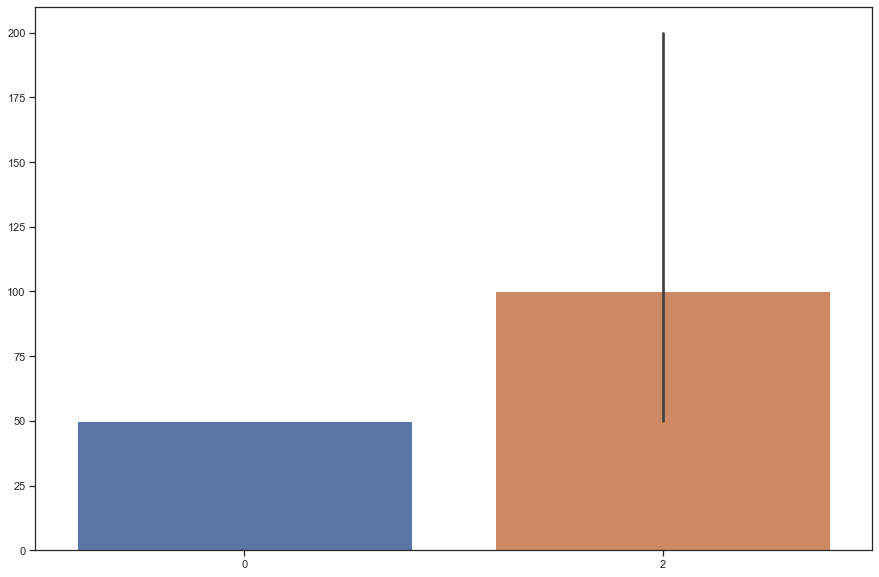

In [76]:
# Lets check for the groupgame name and betamount

plt.subplots(figsize=(15,10))
sns.barplot(list(df['GameGroupName'][0:5]),list(df['BetAmount'][0:5]))

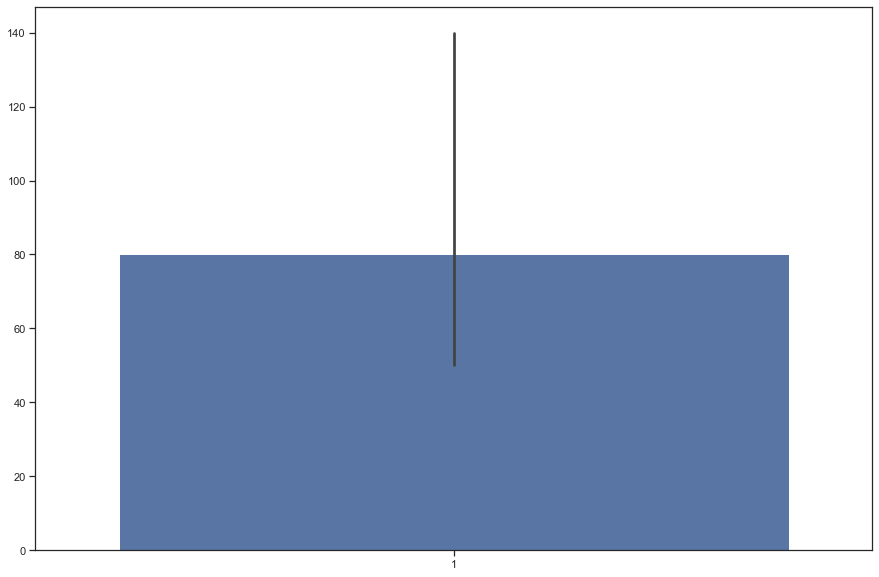

In [77]:
plt.subplots(figsize=(15,10))
sns.barplot(list(df['BetQuantity'][0:5]),list(df['BetAmount'][0:5]))

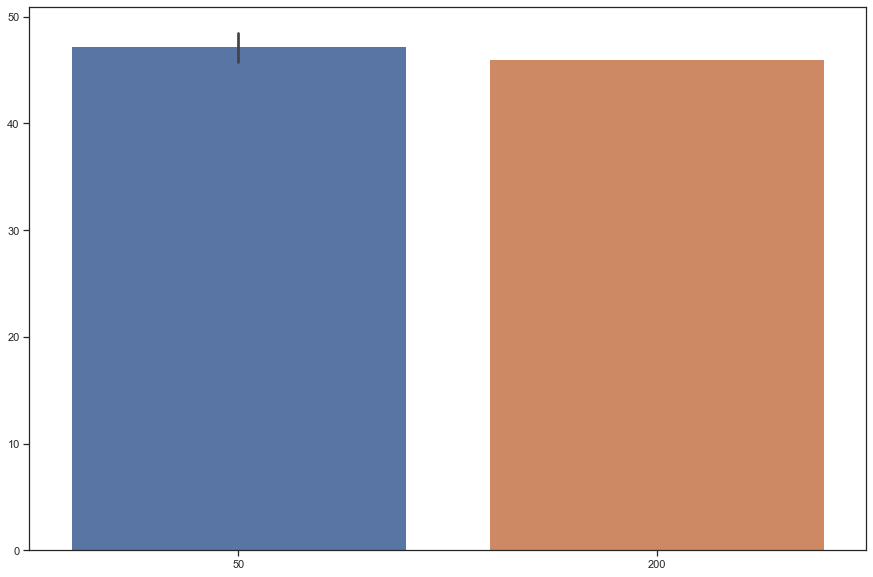

In [78]:
plt.subplots(figsize=(15,10))
sns.barplot(list(df['BetAmount'][0:5]),list(df['PurchaseTime'][0:5]))

Above plot discuss about bet amount at what time it is being purchased

In [79]:
df.head()

,PlayerId,GameGroupName,GameName,BetQuantity,BetAmount,PurchaseTime,Purchasedate
0,723713783,2,4,1,50,45,0
1,721207941,2,4,1,200,46,0
2,722276226,0,5,1,50,47,0
3,722508537,0,5,1,50,48,0
4,727445330,2,4,1,50,49,0


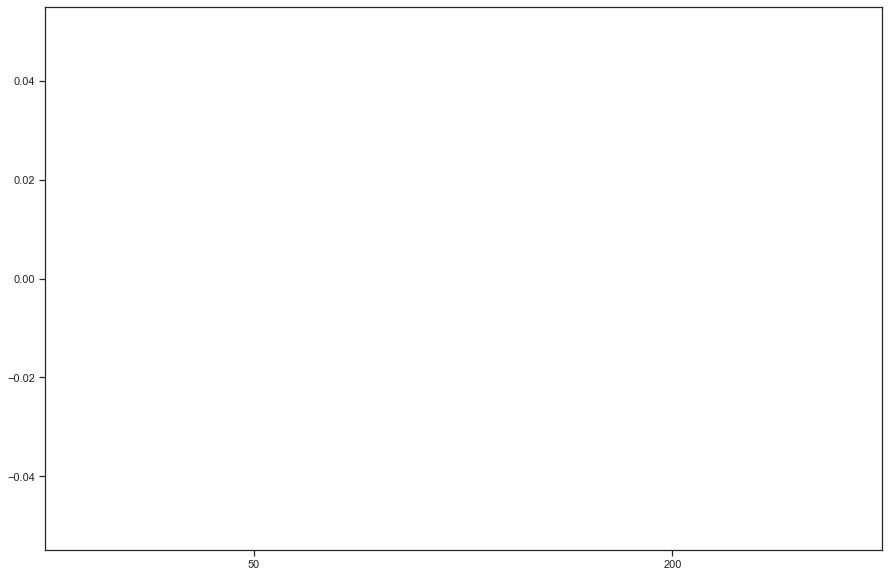

In [80]:
# Lets see when it is purchased

plt.subplots(figsize=(15,10))
sns.barplot(list(df['BetAmount'][0:5]),list(df['Purchasedate'][0:5]))

from the above plot, all is purchased at the same dates.

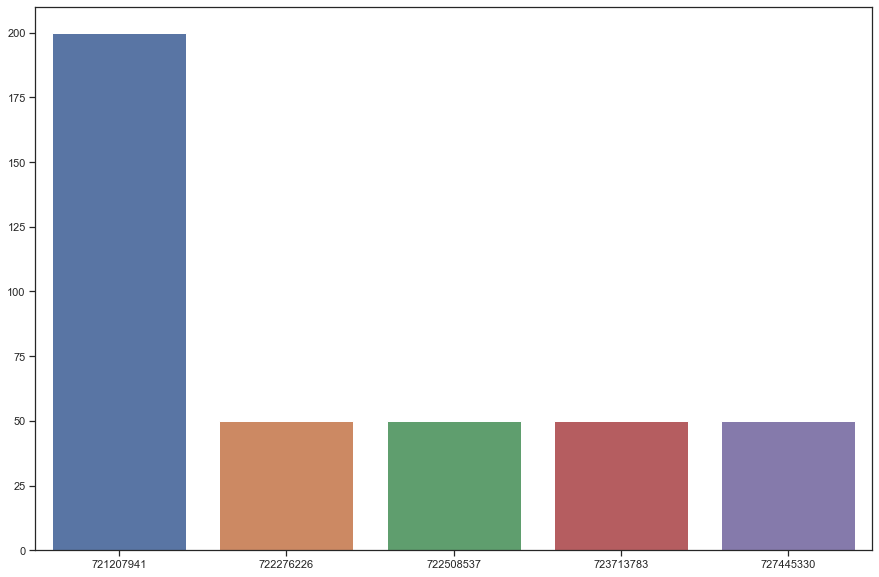

In [81]:
plt.subplots(figsize=(15,10))
sns.barplot(list(df['PlayerId'][0:5]),list(df['BetAmount'][0:5]))

### This is the most important plot as it says the amount of bet has been put on specific players . and also shows the maximum amount of bet has been put in the player id- 721207941

In [82]:
df.head()

,PlayerId,GameGroupName,GameName,BetQuantity,BetAmount,PurchaseTime,Purchasedate
0,723713783,2,4,1,50,45,0
1,721207941,2,4,1,200,46,0
2,722276226,0,5,1,50,47,0
3,722508537,0,5,1,50,48,0
4,727445330,2,4,1,50,49,0


In [83]:
## Lets find out the maximum bet amount for the playerid from the given dataset
df[['PlayerId','BetAmount']].sort_values(by='BetAmount',ascending=False).head()

,PlayerId,BetAmount
202,727261816,1000
429,721258912,850
163,721258912,850
541,721258912,650
540,721258912,450


In [84]:
## Lets find out the maximum bet amount for the GameName from the given dataset
df[['BetAmount','GameName']].sort_values(by='BetAmount',ascending=False).head()

,BetAmount,GameName
202,1000,8
429,850,1
163,850,7
541,650,6
540,450,3


In [85]:
## Lets find out the maximum bet amount for the GameGroupName from the given dataset
df[['BetAmount','GameGroupName']].sort_values(by='BetAmount',ascending=False).head()

,BetAmount,GameGroupName
202,1000,0
429,850,1
163,850,0
541,650,0
540,450,2


In [86]:
X=df.drop(['PlayerId'],axis=1)
y=df['PlayerId']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [88]:

# RMSE Calculation
from sklearn.metrics import mean_squared_error

predictions=lin_reg.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
rmse

12741384.966823962

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8,10]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4,6]}
]
forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg, param_grid, cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [90]:
print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))

{'max_features': 2, 'n_estimators': 10} 36654995.31005484


In [93]:
feature_importances=grid_search.best_estimator_.feature_importances_
features=sorted(zip(feature_importances, df),reverse=True)
features_sorted=np.array(features)
features_sorted

array([['0.736117404436444', 'BetAmount'],
       ['0.13105487743235328', 'BetQuantity'],
       ['0.05126683697855515', 'GameGroupName'],
       ['0.04343524438056817', 'PurchaseTime'],
       ['0.02236303148137926', 'GameName'],
       ['0.01576260529070012', 'PlayerId']], dtype='<U32')

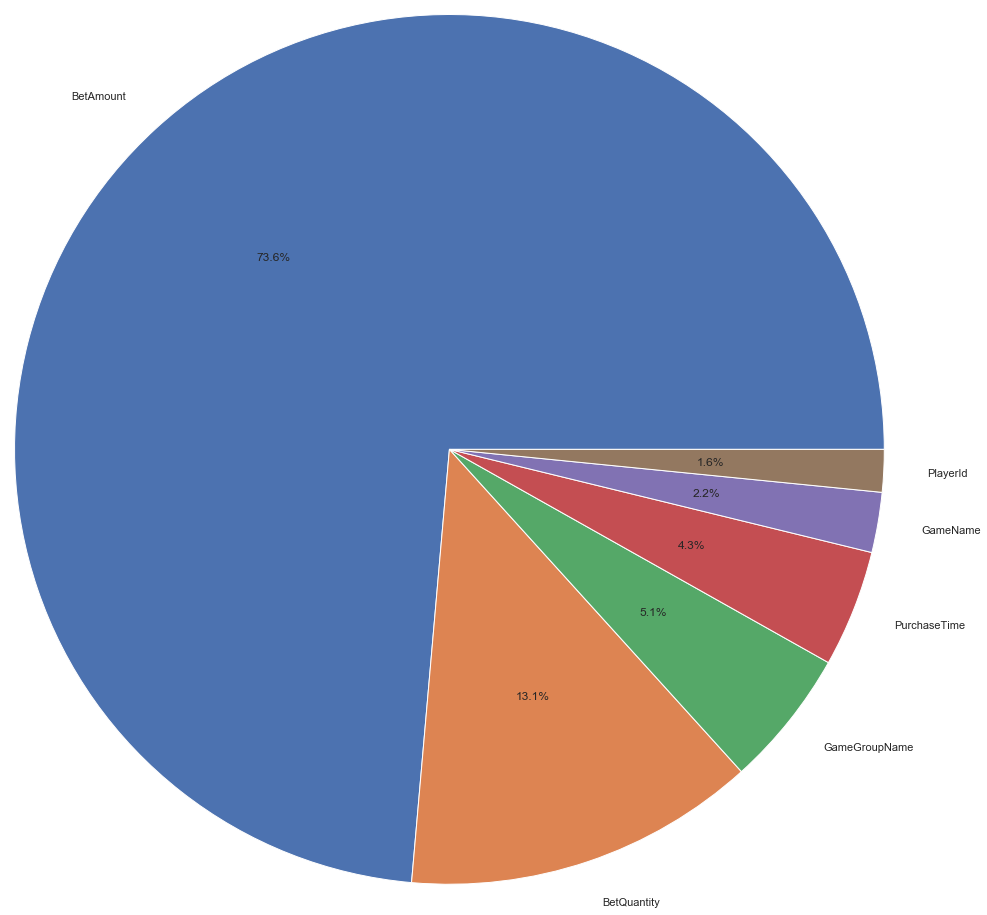

In [94]:
plt.pie(features_sorted[:,0], labels=features_sorted[:,1],radius=5,autopct='%1.1f%%')
plt.show()